# **Dataset**
This comprehensive dataset offers a decade's worth of insights into gold price trends, spanning from 2013 to 2023. It meticulously captures:

📈 Daily opening and closing prices

🔼 Highs and lows for each day

🔁 Trading volume

Such a wealth of information is instrumental for those seeking to analyze or visualize market dynamics over this ten-year period.

Source from kaggle: https://www.kaggle.com/datasets/farzadnekouei/gold-price-10-years-20132023/data



## **Import data**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("farzadnekouei/gold-price-10-years-20132023")

print("Path to dataset files:", path)

100%|██████████| 46.3k/46.3k [00:00<00:00, 7.88MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/farzadnekouei/gold-price-10-years-20132023/versions/1


In [ ]:
import os
files = os.listdir(path)
import pandas as pd
if files:  # Check if files exist
    csv_path = os.path.join(path, files[0])  # Assumes first file is the data
    df = pd.read_csv(csv_path)
    print(df.head())

         Date     Price      Open      High       Low     Vol. Change %
0  12/30/2022  1,826.20  1,821.80  1,832.40  1,819.80  107.50K    0.01%
1  12/29/2022  1,826.00  1,812.30  1,827.30  1,811.20  105.99K    0.56%
2  12/28/2022  1,815.80  1,822.40  1,822.80  1,804.20  118.08K   -0.40%
3  12/27/2022  1,823.10  1,808.20  1,841.90  1,808.00  159.62K    0.74%
4  12/26/2022  1,809.70  1,805.80  1,811.95  1,805.55      NaN    0.30%


In [ ]:
df[:5]

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,5
Change %,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# **Preprocessing**

In [ ]:
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Price,Open,High,Low
0,2013-01-02,"1,689.90","1,675.80","1,695.00","1,672.10"
1,2013-01-03,"1,675.60","1,688.00","1,689.30","1,664.30"
2,2013-01-04,"1,649.90","1,664.40","1,664.40","1,630.00"
3,2013-01-07,"1,647.20","1,657.30","1,663.80","1,645.30"
4,2013-01-08,"1,663.20","1,651.50","1,662.60","1,648.80"


In [ ]:
# Convert price columns and change from text to numbers
# Remove punctuation and units like $ or %
NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')

df.head()

,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.0,1672.1
1,2013-01-03,1675.6,1688.0,1689.3,1664.3
2,2013-01-04,1649.9,1664.4,1664.4,1630.0
3,2013-01-07,1647.2,1657.3,1663.8,1645.3
4,2013-01-08,1663.2,1651.5,1662.6,1648.8


In [ ]:
#df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

In [ ]:
#4. Dealing with Missing Values
# Fill in missing values ​​in trading volume with average values
# if df['Vol.'].isnull().sum() > 0:
#     df['Vol.'] = df['Vol.'].fillna(df['Vol.'].mean())

In [ ]:
# Adding the daily price range variable
#df['PriceRange'] = df['High'] - df['Low']

# analysis

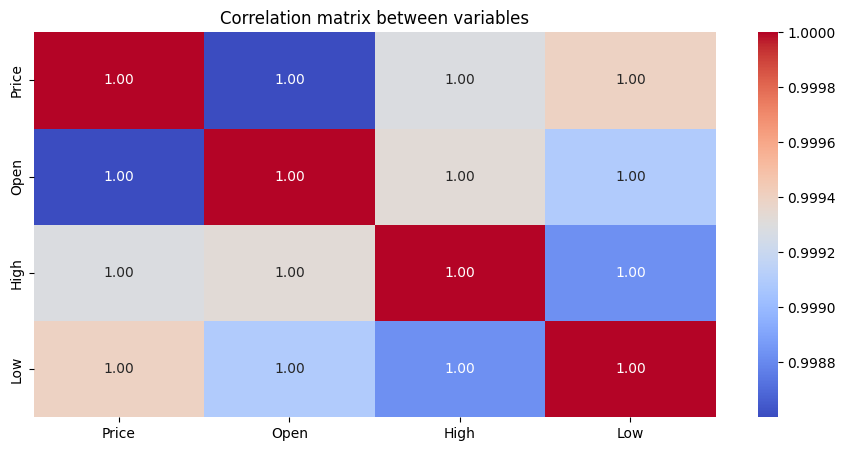

In [ ]:
#7. Correlation Analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation = df[numeric_cols].corr()
plt.figure(figsize=(11, 5))

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix between variables')
plt.show()

isssue -> multicollinearity !!

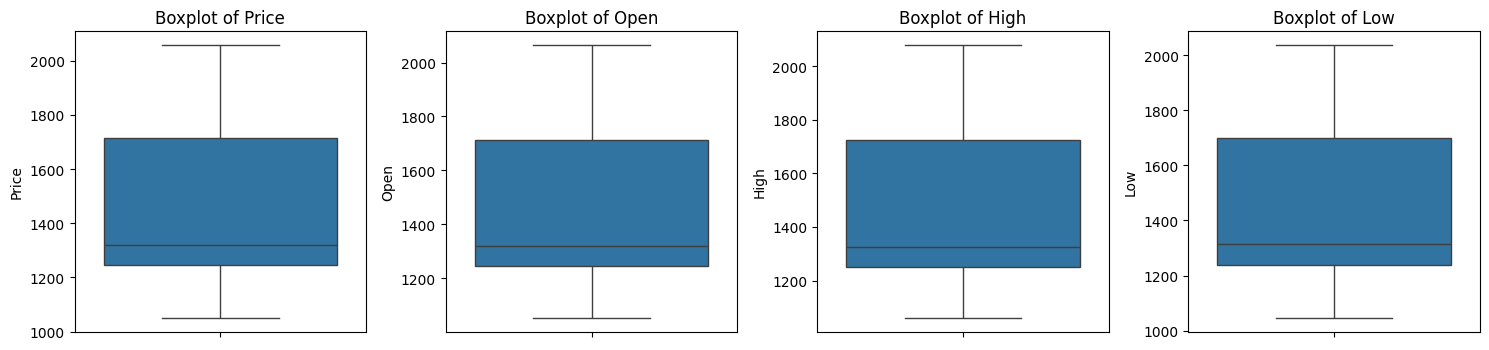

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()


In [ ]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Price'] < Q1 - 1.5 * IQR) | (df['Price'] > Q3 + 1.5 * IQR)]
print(f"عدد القيم الشاذة في Price: {len(outliers)}")


عدد القيم الشاذة في Price: 0


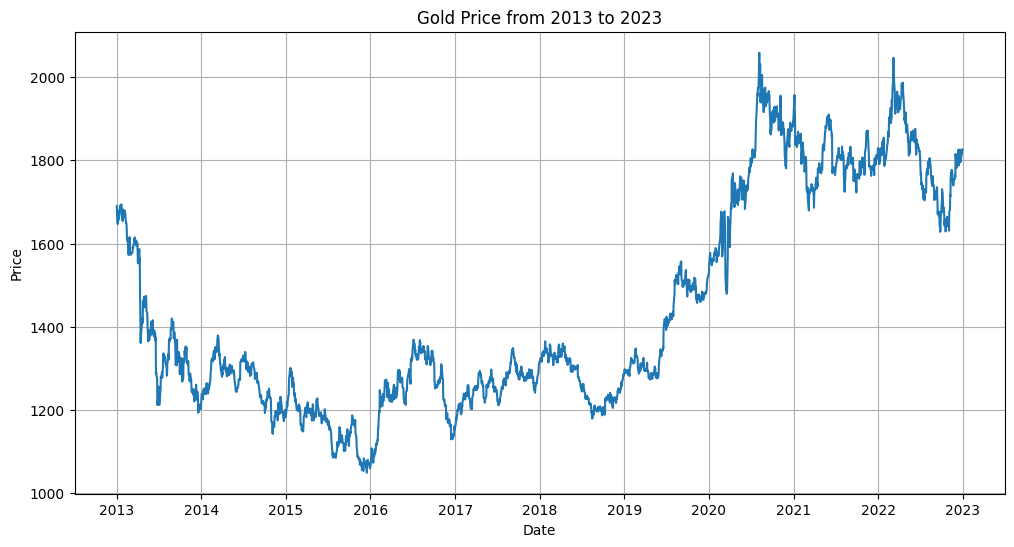

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Date, df['Price'])
plt.title('Gold Price from 2013 to 2023')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('gold_price_trend.png')
plt.show()


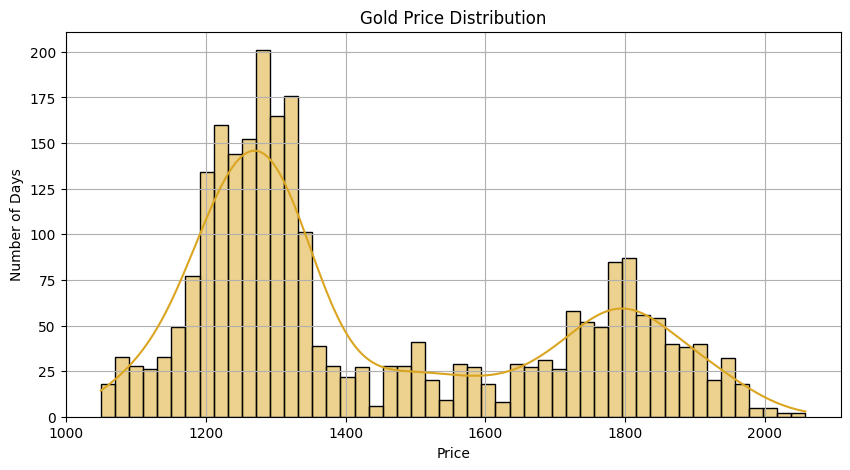

In [ ]:

# The histogram above shows the distribution of gold prices from 2013 to 2023.
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=50, color='goldenrod', kde=True)
plt.title('Gold Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Days')
plt.grid(True)
plt.show()


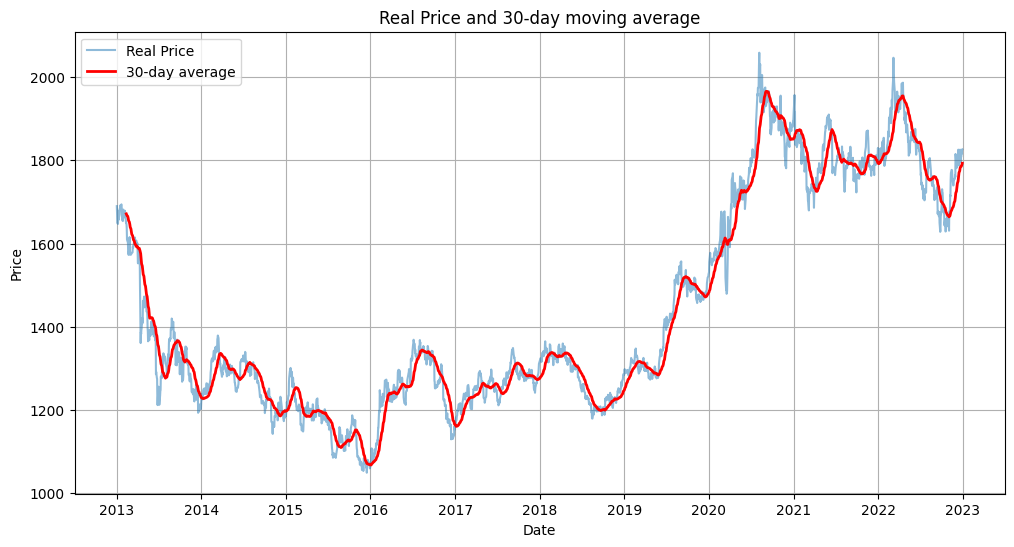

In [ ]:
rolling_mean = df['Price'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.Date, df['Price'], label='Real Price', alpha=0.5)
plt.plot(df.Date, rolling_mean, label='30-day average', color='red', linewidth=2)
plt.title('Real Price and 30-day moving average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

n essence, this code calculates a 10-day EMA of the gold price. The EMA is a type of moving average that gives more weight to recent data points, making it more responsive to new information compared to a simple moving average. This is often used in financial analysis to smooth out price data and identify trends.

In [ ]:
# exponantial moving avg
#df['EMA20'] = df['Price'].ewm(span=10, adjust=True).mean()

In [ ]:
# #  plots the 10-day Exponential Moving Average (EMA20) of gold prices.
# plt.figure(figsize=(15, 6), dpi=150)
# df.EMA20.plot()
# plt.xlabel("Total Natural Demand")
# plt.ylabel("gold price value ")
# plt.title("Moving Average 250")
# plt.show()



In [ ]:
df.head()

,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.0,1672.1
1,2013-01-03,1675.6,1688.0,1689.3,1664.3
2,2013-01-04,1649.9,1664.4,1664.4,1630.0
3,2013-01-07,1647.2,1657.3,1663.8,1645.3
4,2013-01-08,1663.2,1651.5,1662.6,1648.8


# split

Since we cannot train on future data in time series data, we should not divide the time series data randomly. In time series splitting, testing set is always later than training set. We consider the last year for testing and everything else for training

In [ ]:
# spliting
test_size = df[df.Date.dt.year==2022].shape[0]
test_size

260

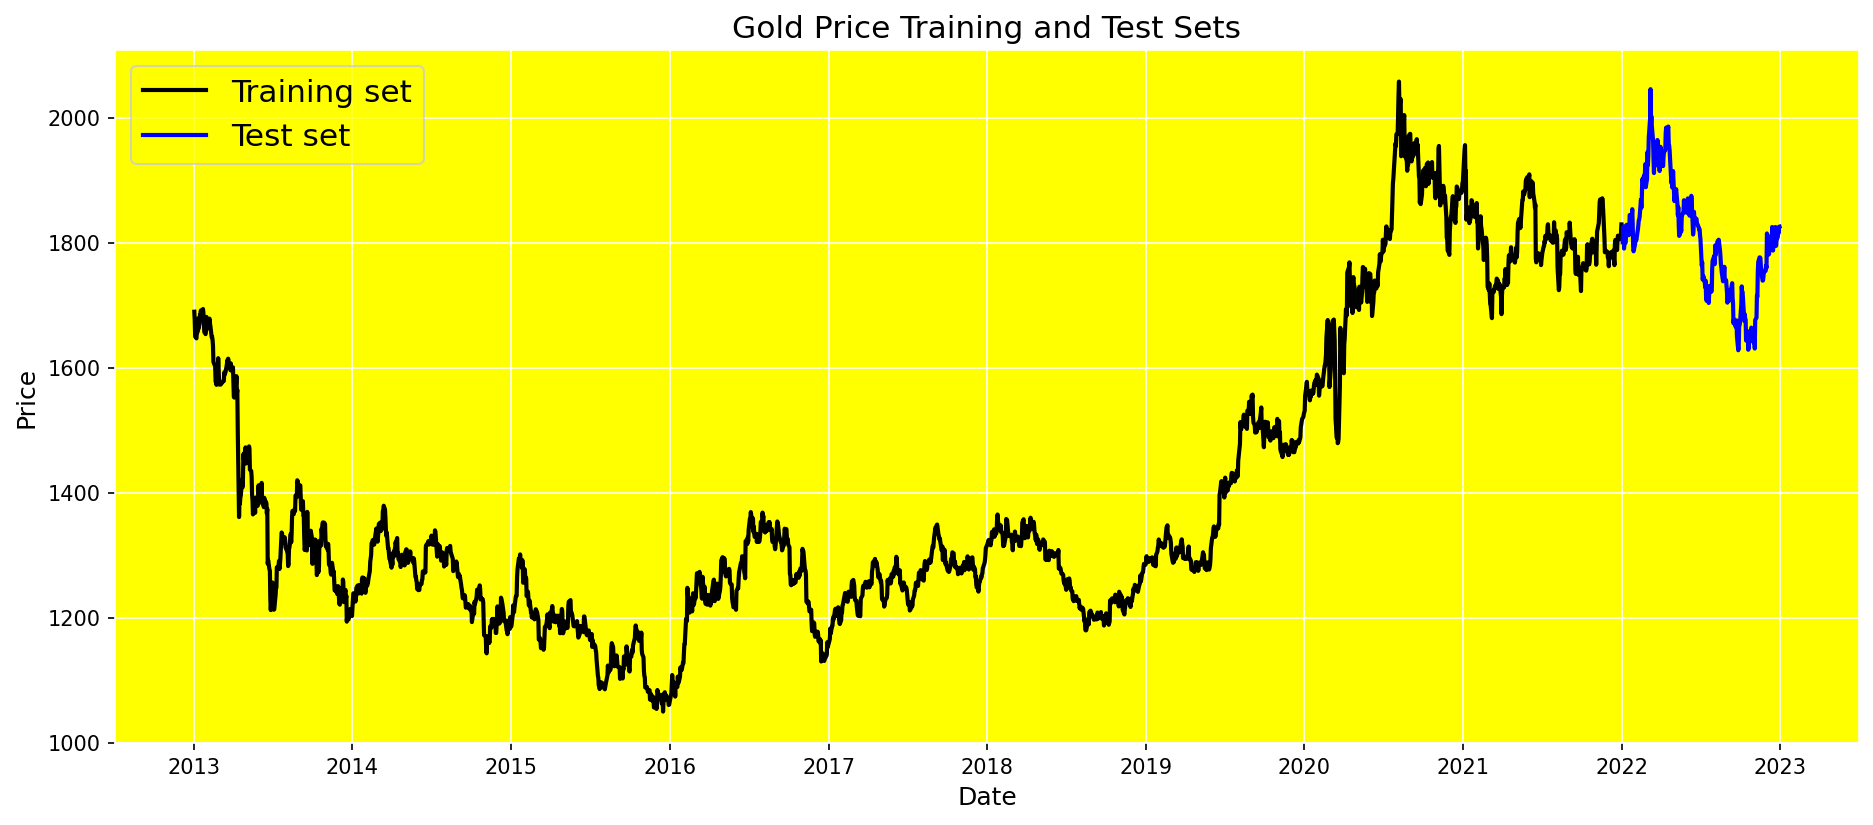

In [ ]:
#Gold Price Training and Test Sets Plot:

plt.figure(figsize=(15, 6), dpi=150)
# sets the dots per inch, which affects the resolution of the plot.

plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot( df.Date[:-test_size], df.Price[:-test_size], color='black', lw=2)
plt.plot( df.Date[-test_size:], df.Price[-test_size:], color='blue', lw=2)
plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

# data preparation

In [ ]:
scaler = MinMaxScaler()


In [ ]:
train_data = df.Price[:-test_size]
train_data = scaler.fit_transform(train_data.values.reshape(-1,1))

In [ ]:
test_data = df.Price[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

*use* min max scaler to avoid any change on the distributions (despite the data almost in the same scale but it's brefer to have standard pipeline since it might increase in the future and to simplify the computation )


In [ ]:
#$$ for multiple feature


# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# # Assume `data` is a DataFrame with columns: ['Price', 'Open', 'High', 'Low', ...]
# features = ['Price', 'Open', 'High', 'Low']  # Input features
# target = 'Price'                             # Target to predict

# # Scale features and target
# scaler_X = MinMaxScaler()
# scaler_y = MinMaxScaler()

# X_scaled = scaler_X.fit_transform(train_data[features].values)
# y_scaled = scaler_y.fit_transform(train_data[[target]])  # Target is still 1D

# # Split into train/test (time-series: no shuffling!)
# X_test = scaler_X.transform(test_data[features])
# y_test = scaler_y.transform(test_data[[target]])

In [ ]:
window_size = 60

In [ ]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [ ]:
#$$ for multiple feature
# window_size = 60

# def create_sequences(X, y, window_size):
#     X_seq, y_seq = [], []
#     for i in range(window_size, len(X)):
#         X_seq.append(X[i-window_size:i])
#         y_seq.append(y[i])                # Shape: (1,)
#     return np.array(X_seq), np.array(y_seq)

# X_train_seq, y_train_seq = create_sequences(X_scaled, y_scaled, window_size)
# X_test_seq, y_test_seq = create_sequences(X_test, y_test, window_size)

In [ ]:
#$$ for multiple feature

# print("X_train_seq shape:", X_train_seq.shape)  # (n_samples, 60, 4)
# print("y_train_seq shape:", y_train_seq.shape)  # (n_samples, 1)

# model building

Restructure Data & Create Sliding Window¶

The use of prior time steps to predict the next time step is called sliding window. In this way, time series data can be expressed as supervised learning. We can do this by using previous time steps as input variables and use the next time step as the output variable. The number of previous time steps is called the window width. Here we set window width to 60. Therefore, X_train and X_test will be nested lists containing lists of 60 time-stamp prices. y_train and y_test are also lists of gold prices containing the next day's gold price corresponds to each list in X_train and X_test respectively

In [ ]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)



In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [ ]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (2263, 60, 1)
y_train Shape:  (2263, 1)
X_test Shape:   (260, 60, 1)
y_test Shape:   (260, 1)


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [ ]:
def define_model():
    input1 = Input(shape=(window_size, 1))
    x = LSTM(units = 64, return_sequences=True)(input1)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()

    return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard



early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2, patience=5,
                              min_lr=1e-6)

checkpoint = ModelCheckpoint('best_model_many_feature.h5',
                             monitor='val_loss',
                             save_best_only=True)

import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks = [early_stop, reduce_lr, checkpoint, tensorboard]

In [ ]:
model = define_model()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=150, shuffle=False,
                    batch_size=32, validation_split=0.1,
                    verbose=1, callbacks=callbacks)

Epoch 1/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0375

64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 136ms/step - loss: 0.0375 - val_loss: 0.1237 - learning_rate: 0.0010
Epoch 2/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0351 - val_loss: 0.1919 - learning_rate: 0.0010
Epoch 3/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0191 - val_loss: 0.1935 - learning_rate: 0.0010
Epoch 4/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - loss: 0.0186 - val_loss: 0.1933 - learning_rate: 0.0010
Epoch 5/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.0185 - val_loss: 0.1929 - learning_rate: 0.0010
Epoch 6/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 0.0185 - val_loss: 0.1926 - learning_rate: 0.0010
Epoch 7/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0171 - val_loss: 0.1925 - learning_rate: 2.0000e-04
Epoch 8/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - loss: 0.0171 - val_loss: 0.1926 - learning_rate: 2.0000e-04
Epoch 9/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 0.0171 - val_loss: 0.1927 - learning_rate: 2.0000e

In [ ]:
model.input_shape, X_train.shape

((None, 60, 1), (2263, 60, 1))

In [ ]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1613
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


In [ ]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [ ]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.13829731941223145
Test MAPE: 0.4742616608958153
Test Accuracy: 0.5257383391041848


In [ ]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

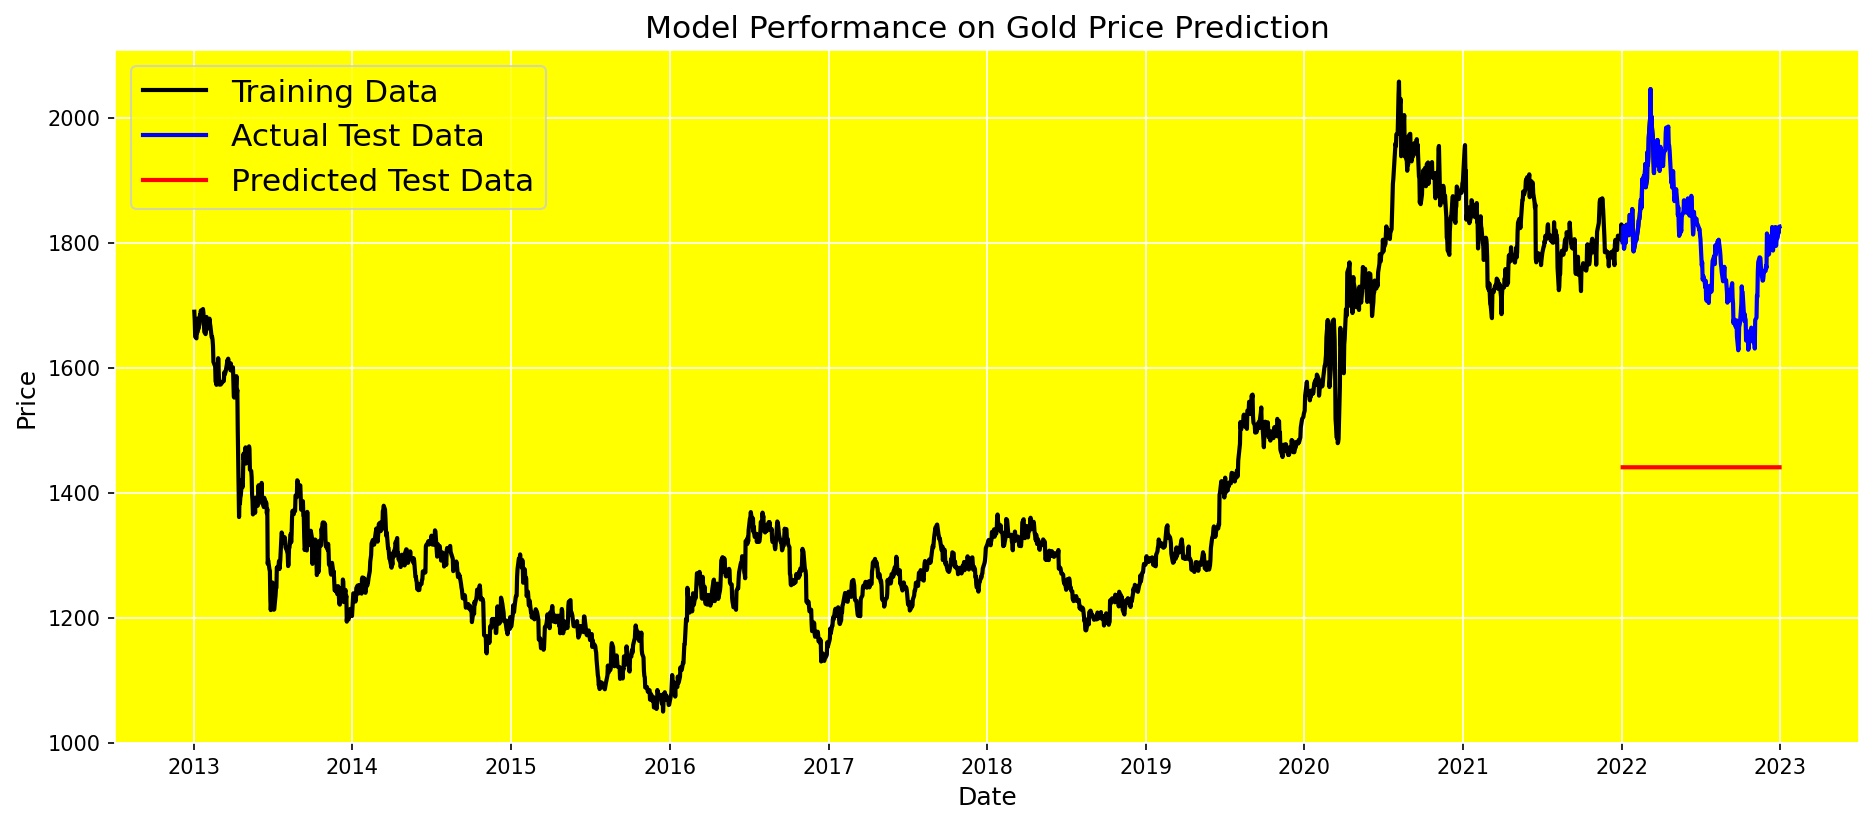

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')

plt.plot(df['Date'].iloc[:-(test_size-60)], df['Price'].iloc[:-(test_size-60)], color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)

plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'],
           loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
len(y_test_true)

260

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_true, y_test_true)
print(f"R² Score: {r2:.4f}")

R² Score: 1.0000


If
R
2
<
0
R
2
 <0, your model is worse than just predicting the mean value every time.

In [ ]:
residuals = y_test_true - y_test_pred

# Basic statistics
print(f"Mean Residual: {np.mean(residuals):.4f}")
print(f"Std Dev of Residuals: {np.std(residuals):.4f}")
print(f"Max Residual: {np.max(residuals):.4f}")
print(f"Min Residual: {np.min(residuals):.4f}")

Mean Residual: 363.9408
Std Dev of Residuals: 91.0447
Max Residual: 605.4919
Min Residual: 187.3943


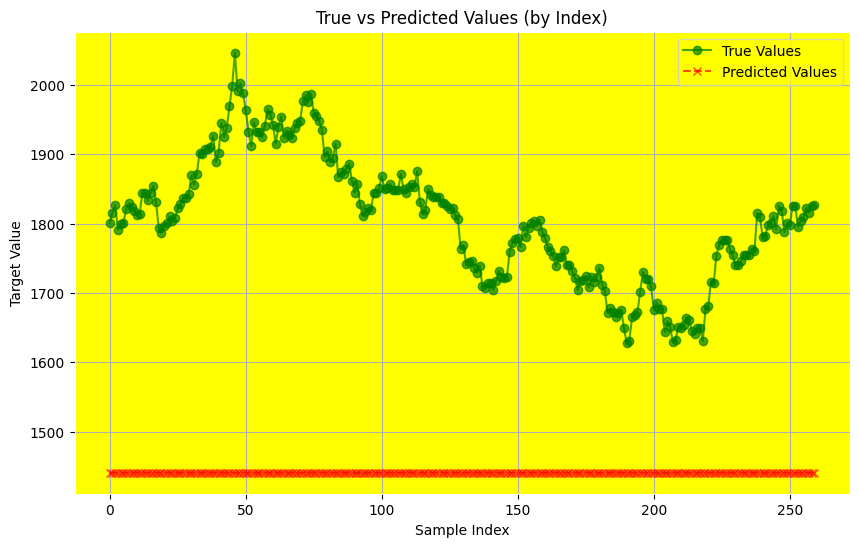

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_true, 'o-', color='green', label='True Values', alpha=0.7)
plt.plot(y_test_pred, 'x--', color='red', label='Predicted Values', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('True vs Predicted Values (by Index)')
plt.legend()
plt.grid(True)
plt.show()

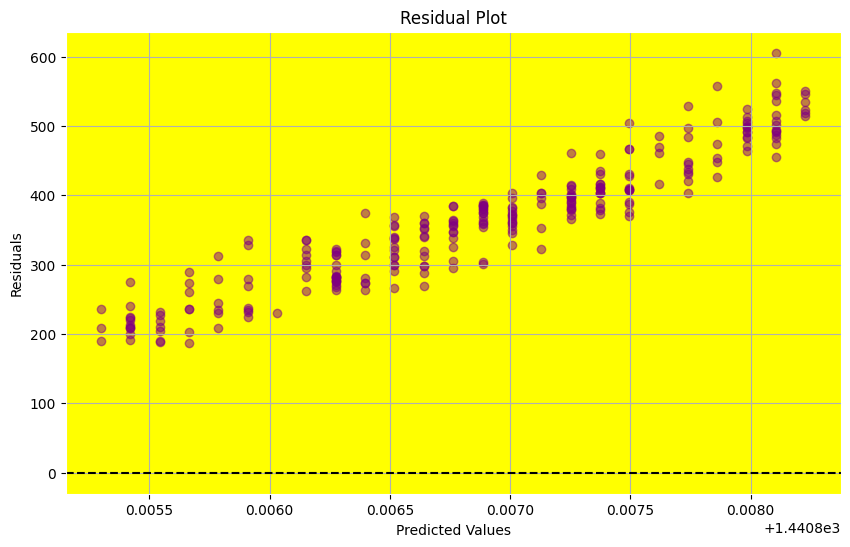

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, c='purple', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

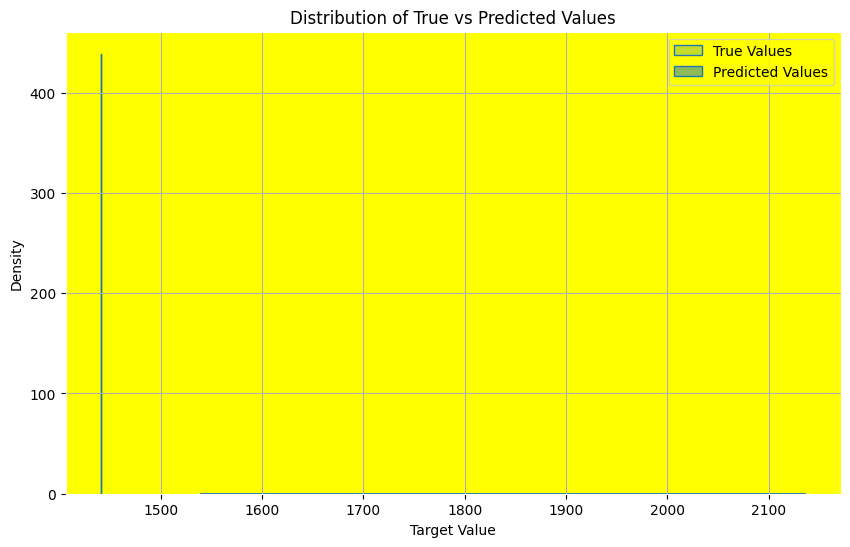

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(y_test_true, color='green', label='True Values', fill=True)
sns.kdeplot(y_test_pred, color='red', label='Predicted Values', fill=True, alpha=0.5)
plt.xlabel('Target Value')
plt.title('Distribution of True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()